In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D

# Parameter
num_words =   # Hanya mempertimbangkan 50.000 kata teratas
maxlen =        # Panjang maksimum tiap sequence
embedding_dim =  # Dimensi embedding

# 1. Memuat dataset IMDB
print("Memuat dataset IMDB...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

Memuat dataset IMDB...


In [20]:
# 2. Padding sequence agar semua input memiliki panjang yang sama
print("Melakukan padding sequence...")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Melakukan padding sequence...


In [21]:
# 3. Membuat model-model
from tensorflow.keras.regularizers import l2

# Model dengan SimpleRNN
def build_model_rnn():

    return model

# Model dengan LSTM
def build_model_lstm():

    return model

# Model dengan GRU
def build_model_gru():

    return model

In [22]:
from tensorflow.keras import backend as K
K.clear_session()  # Menghapus session yang lama

# Kemudian buat model baru
model_rnn = build_model_rnn()
model_lstm = build_model_lstm()
model_gru = build_model_gru()

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# Inisialisasi EarlyStopping: monitor loss validasi, dengan sabar 3 epoch dan restore bobot terbaik
early_stop = EarlyStopping()

# Melatih model SimpleRNN dengan EarlyStopping
history_rnn = model_rnn.fit(
    x_train, y_train,
    epochs=,  # atau epoch sesuai keinginan
    batch_size=,
    validation_split=,
    callbacks=[early_stop]
)
score_rnn = model_rnn.evaluate(x_test, y_test, verbose=0)
print("Akurasi Test SimpleRNN: {:.2f}%".format(score_rnn[1] * 100))

# Melatih model LSTM dengan EarlyStopping
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=,
    batch_size=,
    validation_split=,
    callbacks=[early_stop]
)
score_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
print("Akurasi Test LSTM: {:.2f}%".format(score_lstm[1] * 100))

# Melatih model GRU dengan EarlyStopping
history_gru = model_gru.fit(
    x_train, y_train,
    epochs=,
    batch_size=,
    validation_split=,
    callbacks=[early_stop]
)
score_gru = model_gru.evaluate(x_test, y_test, verbose=0)
print("Akurasi Test GRU: {:.2f}%".format(score_gru[1] * 100))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5003 - loss: 0.7177 - val_accuracy: 0.5056 - val_loss: 0.7061
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5013 - loss: 0.7074 - val_accuracy: 0.5052 - val_loss: 0.7033
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5014 - loss: 0.7046 - val_accuracy: 0.5042 - val_loss: 0.7014
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5086 - loss: 0.7017 - val_accuracy: 0.4936 - val_loss: 0.7005
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4978 - loss: 0.7009 - val_accuracy: 0.5016 - val_loss: 0.6989
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5007 - loss: 0.6989 - val_accuracy: 0.5062 - val_loss: 0.6982
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5048 - loss: 0.6984 - val_accuracy: 0.5166 - val_loss: 0.6971
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5053 - loss: 0.697

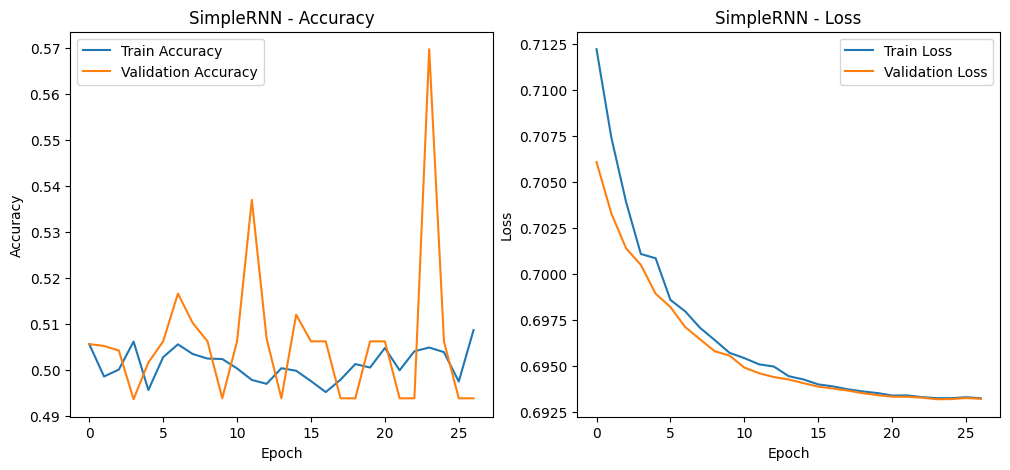

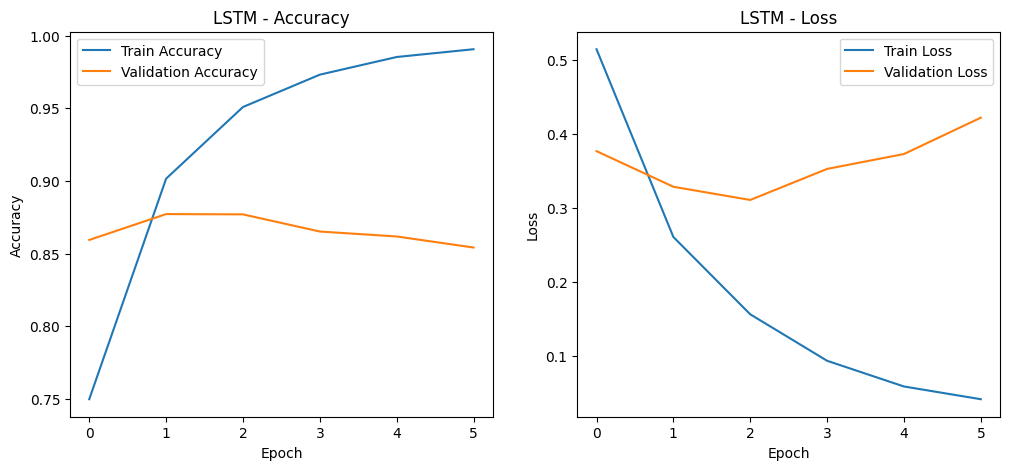

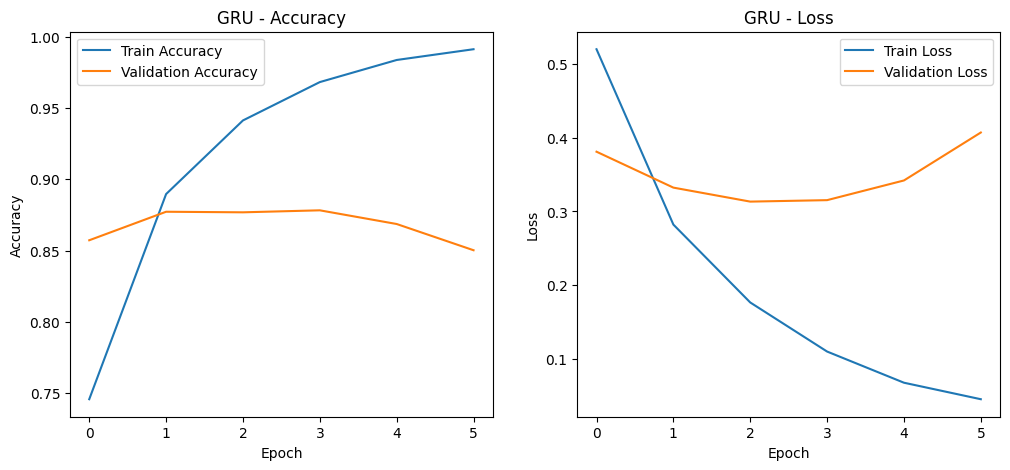

In [25]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Plot akurasi
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Visualisasi untuk SimpleRNN
plot_history(history_rnn, "SimpleRNN")

# Visualisasi untuk LSTM
plot_history(history_lstm, "LSTM")

# Visualisasi untuk GRU
plot_history(history_gru, "GRU")